<h1 style="text-align: center; font-size: 60px;">HOTEL RESERVATION ANALYSIS</h1>
<h3 style="text-align: center; font-size: 20px;">(submitted on 8th Oct 2025)</h3>

## 1) Data Collection

### 1.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame and Read the Data.

In [3]:
df = pd.read_excel('hotel_bookings.xlsx')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2022,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2022-07-01
1,Resort Hotel,0,737,2022,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2022-07-01
2,Resort Hotel,0,7,2022,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2022-07-02
3,Resort Hotel,0,13,2022,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2022-07-02
4,Resort Hotel,0,14,2022,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2022-07-03


In [5]:
df.shape

(119390, 32)

## 2) Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 2.1 Check Missing values

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Fill up empty records

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [13]:
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(df['agent'].mean(), inplace=True)
df['company'].fillna(df['company'].mean(), inplace=True)
df = df.dropna()
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### 2.2 Check Duplicates

In [18]:
df.duplicated().sum()              # count duplicates
df.drop_duplicates(inplace=True)   # remove them

In [19]:
df.shape

(87373, 32)

### 2.3 Check data types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87373 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87373 non-null  object        
 1   is_canceled                     87373 non-null  int64         
 2   lead_time                       87373 non-null  int64         
 3   arrival_date_year               87373 non-null  int64         
 4   arrival_date_month              87373 non-null  object        
 5   arrival_date_week_number        87373 non-null  int64         
 6   arrival_date_day_of_month       87373 non-null  int64         
 7   stays_in_weekend_nights         87373 non-null  int64         
 8   stays_in_week_nights            87373 non-null  int64         
 9   adults                          87373 non-null  int64         
 10  children                        87373 non-null  float64       
 11  babies

### 2.4 Checking the number of unique values of each column

In [22]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       7
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

### 2.5 Check statistics of data set

In [23]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,...,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373
mean,0.274913,79.909377,2023.210328,26.839859,15.815630,1.005402,2.625662,1.875888,0.138670,0.010827,...,0.030421,0.184039,0.271663,93.094377,188.893248,0.749763,106.348623,0.084248,0.698591,2023-08-31 15:45:17.274215168
min,0.000000,0.000000,2022.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2021-10-17 00:00:00
25%,0.000000,11.000000,2023.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,189.266735,0.000000,72.000000,0.000000,0.000000,2023-03-18 00:00:00
50%,0.000000,49.000000,2023.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,28.000000,189.266735,0.000000,98.100000,0.000000,0.000000,2023-09-08 00:00:00
75%,1.000000,125.000000,2024.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,234.000000,189.266735,0.000000,134.000000,0.000000,1.000000,2024-03-05 00:00:00
max,1.000000,737.000000,2024.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2024-09-14 00:00:00
std,0.446473,86.055917,0.686091,13.673688,8.834683,1.031968,2.053695,0.626486,0.455926,0.113611,...,0.369194,1.732119,0.727324,105.028252,32.042559,10.017042,55.003619,0.281567,0.831948,NaN


### 2.6 Data Cleaning

In [24]:
# basic cleaning
df = df.copy()
# fix month names to numbers if needed
# drop rows with missing critical info if necessary
df['arrival_date_month'] = df['arrival_date_month'].astype(str)
df['total_nights'] = df['stays_in_weekend_nights'].fillna(0) + df['stays_in_week_nights'].fillna(0)

# Revenue per booking (assume adr * total nights, 1 room per booking)
df['booking_revenue'] = df['adr'].fillna(0) * df['total_nights']

# ensure is_canceled is int 0/1
df['is_canceled'] = df['is_canceled'].astype(int)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87373 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87373 non-null  object        
 1   is_canceled                     87373 non-null  int64         
 2   lead_time                       87373 non-null  int64         
 3   arrival_date_year               87373 non-null  int64         
 4   arrival_date_month              87373 non-null  object        
 5   arrival_date_week_number        87373 non-null  int64         
 6   arrival_date_day_of_month       87373 non-null  int64         
 7   stays_in_weekend_nights         87373 non-null  int64         
 8   stays_in_week_nights            87373 non-null  int64         
 9   adults                          87373 non-null  int64         
 10  children                        87373 non-null  float64       
 11  babies

## 3) Exploring Data ( Visualization )

### 3.1 Analyzing the cancellation pattern.

#### 1. Reservations from which countries are cancelled the most ?

In [27]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights',
       'booking_revenue'],
      dtype='object')

In [47]:
country_cancel_counts = df.groupby('country')['is_canceled'].sum().sort_values(ascending = False)

#top 10 countries that cancelled the most
country_cancel_counts.head(10).index

Index(['PRT', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU', 'BRA', 'IRL', 'USA', 'BEL'], dtype='object', name='country')

In [48]:
# Cancellation rate per country
country_counts = df.groupby('country').size()
country_cancel_rate = (df.groupby('country')['is_canceled'].sum() / country_counts).sort_values(ascending=False)
print(country_cancel_rate.head(10).index)

Index(['BEN', 'MYT', 'KHM', 'JEY', 'IMN', 'HND', 'NIC', 'UMI', 'VGB', 'GLP'], dtype='object', name='country')


#####  Insights
- Top 10 countries with high cancellation count--> 'PRT', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU', 'BRA', 'IRL', 'USA', 'BEL'
- Top 10 countries with high cancellation rate (cancel_count/ country_count)--> 'BEN', 'MYT', 'KHM', 'JEY', 'IMN', 'HND', 'NIC', 'UMI', 'VGB', 'GLP'

#### 2. What is the optimum lead time for minimum number of cancellations ?

In [50]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,booking_revenue
0,Resort Hotel,0,342,2022,July,27,1,0,0,2,...,189.266735,0,Transient,0.0,0,0,Check-Out,2022-07-01,0,0.0
1,Resort Hotel,0,737,2022,July,27,1,0,0,2,...,189.266735,0,Transient,0.0,0,0,Check-Out,2022-07-01,0,0.0
2,Resort Hotel,0,7,2022,July,27,1,0,1,1,...,189.266735,0,Transient,75.0,0,0,Check-Out,2022-07-02,1,75.0
3,Resort Hotel,0,13,2022,July,27,1,0,1,1,...,189.266735,0,Transient,75.0,0,0,Check-Out,2022-07-02,1,75.0
4,Resort Hotel,0,14,2022,July,27,1,0,2,2,...,189.266735,0,Transient,98.0,0,1,Check-Out,2022-07-03,2,196.0


lead_time_bin
0          0.059109
1-3        0.082298
4-7        0.113931
8-14       0.205959
15-30      0.282733
31-60      0.316262
61-90      0.325519
91-180     0.349833
181-365    0.396786
>365       0.408850
Name: is_canceled, dtype: float64


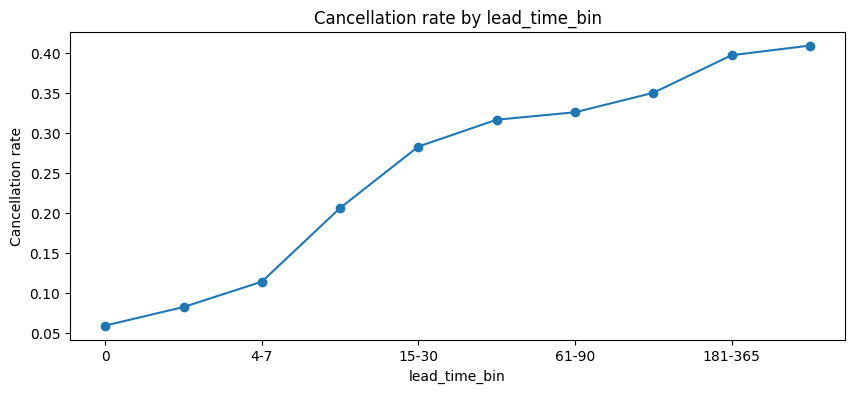

Lead time bin with minimum cancellation rate: 0 0.05910917615539183


In [56]:
bins = [ -1, 0, 3, 7, 14, 30, 60, 90, 180, 365, df['lead_time'].max()+1 ]
labels = ['0','1-3','4-7','8-14','15-30','31-60','61-90','91-180','181-365','>365']
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=bins, labels=labels)

lead_time_rate = df.groupby('lead_time_bin')['is_canceled'].mean().sort_index()
print(lead_time_rate)

plt.figure(figsize=(10,4))
lead_time_rate.plot(marker='o')
plt.ylabel('Cancellation rate')
plt.title('Cancellation rate by lead_time_bin')
plt.show()

# find bin with minimum cancellation rate
best_bin = lead_time_rate.idxmin()
print("Lead time bin with minimum cancellation rate:", best_bin, lead_time_rate.min())


#####  Insights
- Optimum lead time for minimum number of cancellations is 0.

#### 3. The months where the cancellations are the maximum.

In [67]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

arrival_date_month
August       0.321603
July         0.318019
April        0.304617
June         0.303155
May          0.292280
December     0.268668
September    0.245441
March        0.243675
October      0.236872
February     0.232272
January      0.221275
November     0.211011
Name: is_canceled, dtype: float64


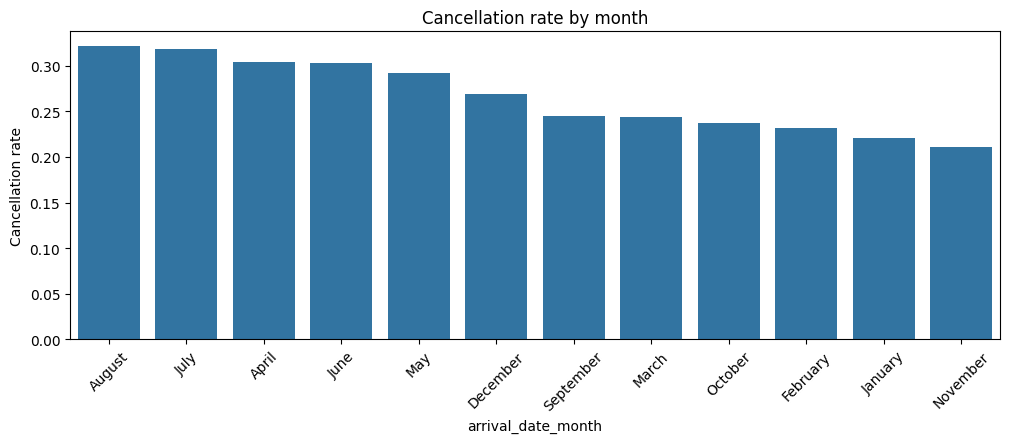

In [72]:
month_cancel_rate = df.groupby('arrival_date_month')['is_canceled'].mean().sort_values(ascending=False)
print(month_cancel_rate)

plt.figure(figsize=(12,4))
sns.barplot(x=month_cancel_rate.index, y=month_cancel_rate.values)
plt.xticks(rotation=45)
plt.ylabel('Cancellation rate')
plt.title('Cancellation rate by month')
plt.show()

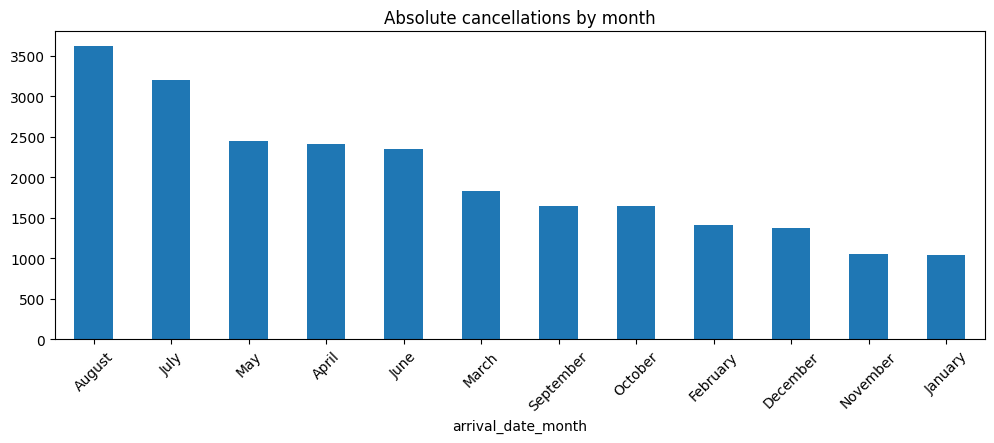

In [76]:
month_cancel_counts = df.groupby('arrival_date_month')['is_canceled'].sum().sort_values(ascending = False)
month_cancel_counts.plot(kind='bar', figsize=(12,4))
plt.title('Absolute cancellations by month')
plt.xticks(rotation=45)
plt.show()

#### Insights:
- Considering Cancellation Rate per month: Maximum for August, July & April.
- Considering Absolute Cancellations by month: Maximum for August, July & May.


#### 4. How do children & babies affect cancellation ?

In [95]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_nights,booking_revenue
count,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,...,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373.000000,87373,87373.000000,87373.000000
mean,0.274913,79.909377,2023.210328,26.839859,15.815630,1.005402,2.625662,1.875888,0.138670,0.010827,...,0.271663,93.094377,188.893248,0.749763,106.348623,0.084248,0.698591,2023-08-31 15:45:17.274215168,3.631065,394.369396
min,0.000000,0.000000,2022.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2021-10-17 00:00:00,0.000000,-63.800000
25%,0.000000,11.000000,2023.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,9.000000,189.266735,0.000000,72.000000,0.000000,0.000000,2023-03-18 00:00:00,2.000000,153.000000
50%,0.000000,49.000000,2023.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,28.000000,189.266735,0.000000,98.100000,0.000000,0.000000,2023-09-08 00:00:00,3.000000,299.010000
75%,1.000000,125.000000,2024.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,234.000000,189.266735,0.000000,134.000000,0.000000,1.000000,2024-03-05 00:00:00,5.000000,503.200000
max,1.000000,737.000000,2024.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2024-09-14 00:00:00,69.000000,7590.000000
std,0.446473,86.055917,0.686091,13.673688,8.834683,1.031968,2.053695,0.626486,0.455926,0.113611,...,0.727324,105.028252,32.042559,10.017042,55.003619,0.281567,0.831948,NaN,2.763583,369.453751


children
0.0     0.266235
1.0     0.312034
2.0     0.418313
3.0     0.213333
10.0    1.000000
Name: is_canceled, dtype: float64


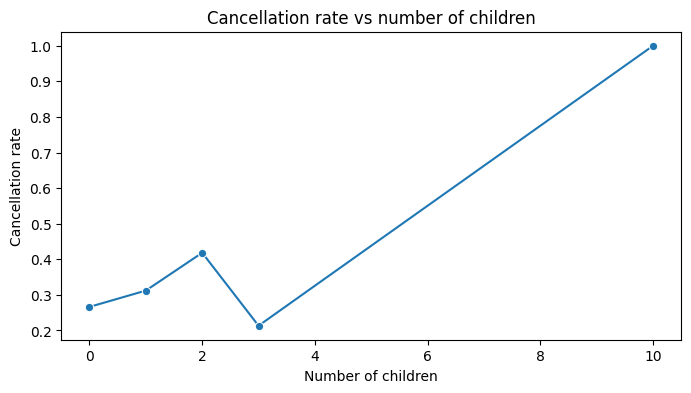

In [80]:
# group by number of children

children_rate = df.groupby('children')['is_canceled'].mean()
print(children_rate)

plt.figure(figsize=(8,4))
sns.lineplot(x=children_rate.index, y=children_rate.values, marker='o')
plt.xlabel('Number of children')
plt.ylabel('Cancellation rate')
plt.title('Cancellation rate vs number of children')
plt.show()

babies
0     0.275888
1     0.183946
2     0.133333
9     0.000000
10    0.000000
Name: is_canceled, dtype: float64


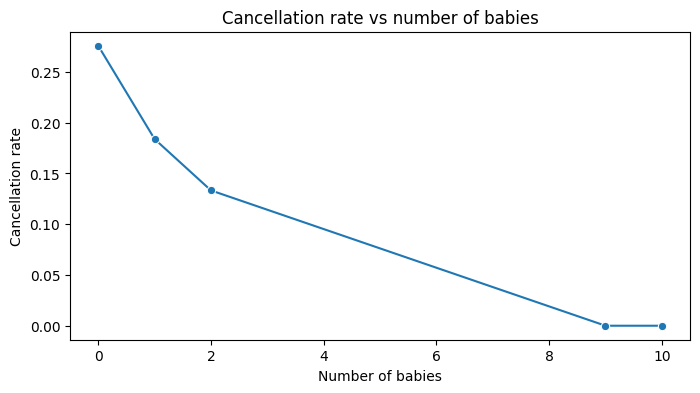

In [78]:
# babies
babies_rate = df.groupby('babies')['is_canceled'].mean()
print(babies_rate)
plt.figure(figsize=(8,4))
sns.lineplot(x=babies_rate.index, y=babies_rate.values, marker='o')
plt.xlabel('Number of babies')
plt.ylabel('Cancellation rate')
plt.title('Cancellation rate vs number of babies')
plt.show()

#### Insights:
- Cancellation rate is highest for 10 children and least for 3 children.
- Cancellation rate is highest for 0 babies and least for 9-10 babies. 

#### 5. Are cancellations less or more for weekends / week days ?

stays_in_weekend_nights
0     0.247062
1     0.274216
2     0.305657
3     0.335652
4     0.301038
5     0.514286
6     0.495575
7     0.733333
8     0.566667
9     0.600000
10    0.285714
12    0.200000
13    0.000000
14    0.000000
16    0.333333
18    0.000000
19    0.000000
Name: is_canceled, dtype: float64


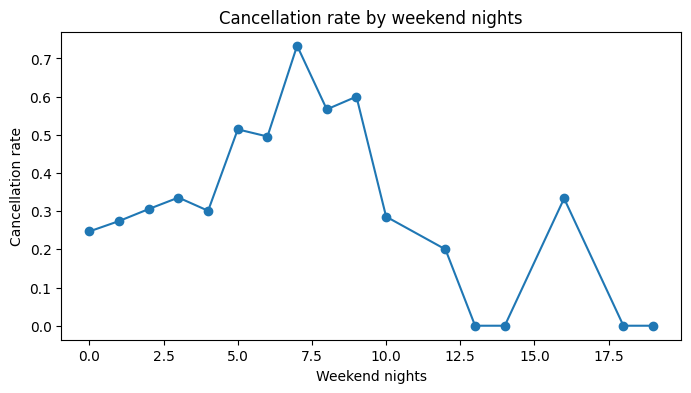

In [104]:
weekend_rate = df.groupby('stays_in_weekend_nights')['is_canceled'].mean()
print(weekend_rate)

# Comparing cancellation rate per number of weekend nights
weekend_nights_rate = df.groupby('stays_in_weekend_nights')['is_canceled'].mean()
plt.figure(figsize=(8,4))
weekend_nights_rate.plot(marker='o')
plt.xlabel('Weekend nights')
plt.ylabel('Cancellation rate')
plt.title('Cancellation rate by weekend nights')
plt.show()

stays_in_week_nights
0     0.185545
1     0.222603
2     0.287636
3     0.298677
4     0.324740
5     0.312772
6     0.377085
7     0.306101
8     0.324633
9     0.383562
10    0.267490
11    0.580000
12    0.550000
13    0.407407
14    0.840000
15    0.426471
16    0.615385
17    0.500000
18    0.833333
19    0.619048
20    0.414634
21    0.733333
22    1.000000
24    1.000000
25    0.000000
26    0.000000
30    0.200000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
40    0.500000
41    0.000000
42    0.000000
50    0.000000
Name: is_canceled, dtype: float64


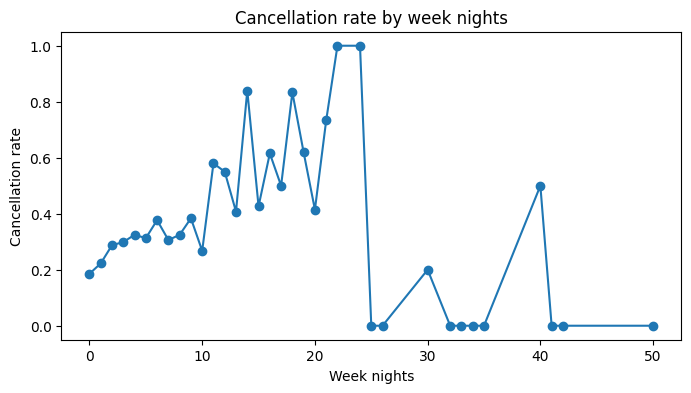

In [106]:
weekday_rate = df.groupby('stays_in_week_nights')['is_canceled'].mean()
print(weekday_rate)

# Comparing cancellation rate per number of weekday nights
weekend_nights_rate = df.groupby('stays_in_week_nights')['is_canceled'].mean()
plt.figure(figsize=(8,4))
weekend_nights_rate.plot(marker='o')
plt.xlabel('Week nights')
plt.ylabel('Cancellation rate')
plt.title('Cancellation rate by week nights')
plt.show()

#### Insights:
- Long stays increase cancellation probability regardless of weekend or weekday nights.
- Weekend stays tend to spike in cancellations at 7 nights (73%), while weekday long stays can reach 100% for extremely long stays (>20 nights).
- Short stays (0–4 nights) have relatively low cancellation rates:
--> Weekend: 24–34%  --> Weekday: 19–32%

#### 6. How number of booking changes affect number of cancellations ?

booking_changes
0     0.301699
1     0.138611
2     0.200684
3     0.149714
4     0.176966
5     0.172414
6     0.288136
7     0.096774
8     0.235294
9     0.125000
10    0.166667
11    0.000000
12    0.000000
13    0.000000
14    0.200000
15    0.000000
16    0.500000
17    0.000000
18    0.000000
20    0.000000
21    0.000000
Name: is_canceled, dtype: float64


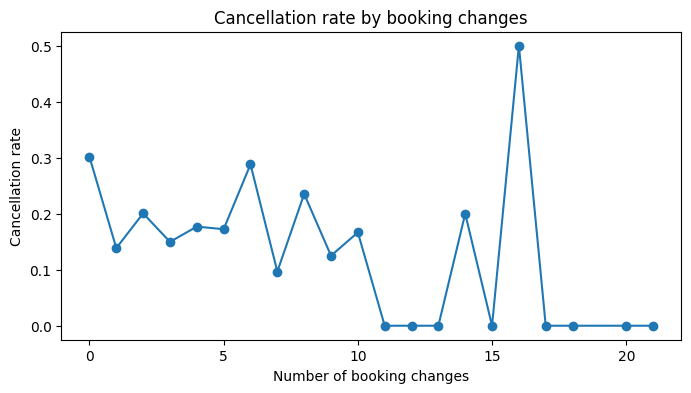

In [108]:
booking_changes_rate = df.groupby('booking_changes')['is_canceled'].mean().sort_index()
print(booking_changes_rate)

plt.figure(figsize=(8,4))
booking_changes_rate.plot(marker='o')
plt.xlabel('Number of booking changes')
plt.ylabel('Cancellation rate')
plt.title('Cancellation rate by booking changes')
plt.show()


#### Insight:
- Higher booking changes can lead to higher cancellations.

#### 7. How days in waiting list affect cancellation ?

waiting_bin
0        0.274248
1        0.250000
2-3      0.428571
4-7      0.277778
8-14     0.487179
15-30    0.495238
>30      0.307810
Name: is_canceled, dtype: float64


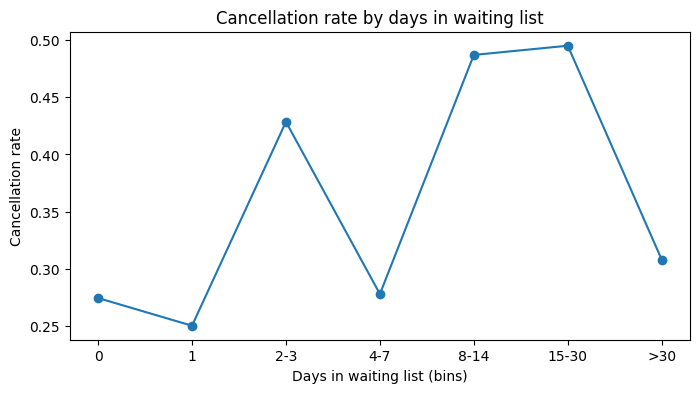

In [109]:
df['waiting_bin'] = pd.cut(df['days_in_waiting_list'].fillna(0), bins=[-1,0,1,3,7,14,30,365], labels=['0','1','2-3','4-7','8-14','15-30','>30'])
waiting_rate = df.groupby('waiting_bin')['is_canceled'].mean()
print(waiting_rate)

plt.figure(figsize=(8,4))
waiting_rate.plot(marker='o')
plt.xlabel('Days in waiting list (bins)')
plt.ylabel('Cancellation rate')
plt.title('Cancellation rate by days in waiting list')
plt.show()

#### Insight:
- More days in waiting list can lead to more cancellations.

#### 8. Which market segment throws maximum cancellations ?

By rate:
 market_segment
Online TA        0.353463
Groups           0.270243
Aviation         0.198238
Offline TA/TO    0.148495
Direct           0.147156
Complementary    0.125356
Corporate        0.121255
Name: is_canceled, dtype: float64

By count:
 market_segment
Online TA        51615
Offline TA/TO    13886
Direct           11797
Groups            4940
Corporate         4206
Complementary      702
Aviation           227
dtype: int64


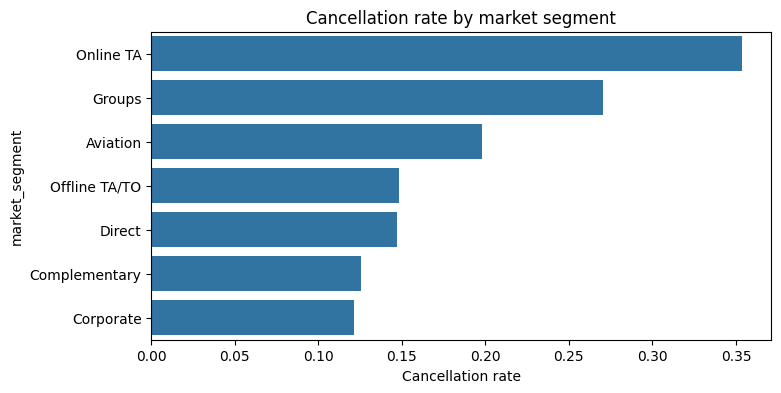

In [112]:
market_rate = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)
market_counts = df.groupby('market_segment').size().sort_values(ascending=False)
print("By rate:\n", market_rate)
print("\nBy count:\n", market_counts)

plt.figure(figsize=(8,4))
sns.barplot(x=market_rate.values, y=market_rate.index)
plt.xlabel('Cancellation rate')
plt.title('Cancellation rate by market segment')
plt.show()


#### Insight:
- Cancellation rate higher for 'Online TA' & 'Groups' compared to other market segments.

#### 9. How the difference between reserved room type & assigned room type affects cancellation ?

In [115]:
df['room_mismatch'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)
mismatch_rate = df.groupby('room_mismatch')['is_canceled'].sum()
print("No mismatch (0) vs mismatch (1):", mismatch_rate)

# Also distribution by mismatch and cancellation
pd.crosstab(df['room_mismatch'], df['is_canceled'], normalize='index')


No mismatch (0) vs mismatch (1): room_mismatch
0    23403
1      617
Name: is_canceled, dtype: int64


is_canceled,0,1
room_mismatch,,
0,0.684901,0.315099
1,0.952904,0.047096


#### Insights:
##### Generally room mismatch leads to more cancellation but here:
- No room mismatch has cancellation rate 31.5% compared to room mismatch 4% .
- i.e Rooms with no mismatch has higher cancellation rate according to recorded data.

#### 10. Which type of customers (transient, contract etc.) throw maximum cancellation? Analyse across all months.

customer_type
Transient          0.301103
Contract           0.163109
Transient-Party    0.152159
Group              0.099265
Name: is_canceled, dtype: float64


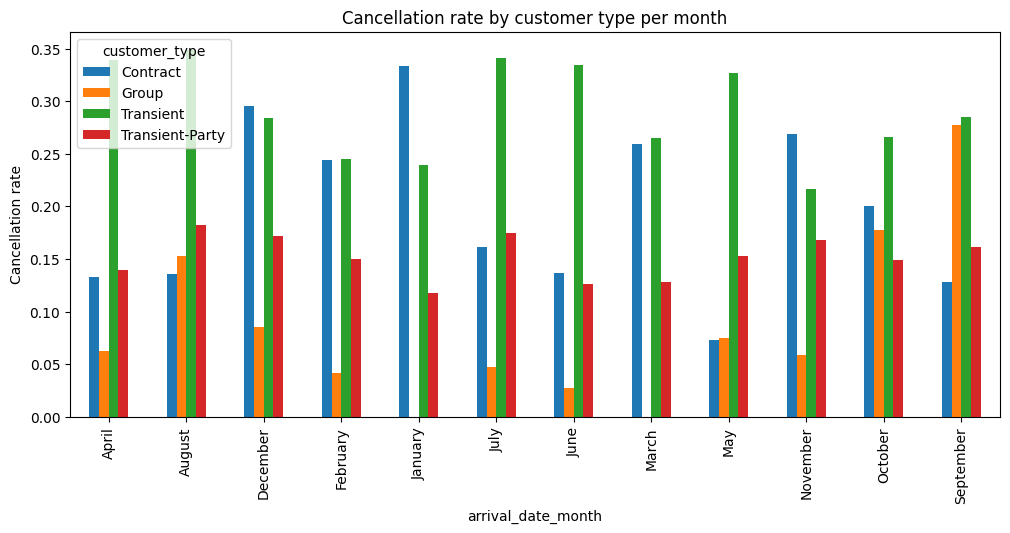

In [118]:
cust_rate = df.groupby('customer_type')['is_canceled'].mean().sort_values(ascending=False)
print(cust_rate)

# Month wise pivot
cust_month = df.pivot_table(index='arrival_date_month', columns='customer_type', values='is_canceled', aggfunc='mean')
cust_month.plot(kind='bar', figsize=(12,5))
plt.ylabel('Cancellation rate')
plt.title('Cancellation rate by customer type per month')
plt.show()


#### Insights:
- Transient customers throw maximum cancellations overall followed by Contract.

#### 11. Do any relationship exist between ADR and cancellations ?

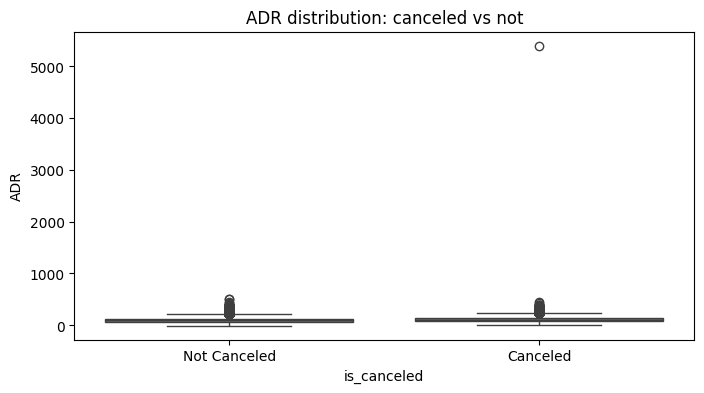

Mean ADR not canceled: 102.01065442836172
Mean ADR canceled: 117.79005995004162


In [128]:
import scipy.stats as stats

# Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.xticks([0,1], ['Not Canceled','Canceled'])
plt.ylabel('ADR')
plt.title('ADR distribution: canceled vs not')
plt.show()

# Mean ADRs
print("Mean ADR not canceled:", df[df['is_canceled']==0]['adr'].mean())
print("Mean ADR canceled:", df[df['is_canceled']==1]['adr'].mean())

#### Insights:
##### Based on Mean ADR's relation with Cancelation:
- Bookings with higher ADR are more likely to be canceled.

### 3.2 Revenue Analysis

#### A. Which countries gave maximum revenue ?

country
PRT    9173489.95
GBR    4722374.74
FRA    3598339.88
ESP    2974742.60
DEU    2113113.24
IRL    1536940.05
ITA    1211894.46
BEL     888707.49
BRA     795511.63
NLD     732529.60
CHE     730856.23
USA     646101.38
CN      439362.89
SWE     379503.97
AUT     370067.19
POL     343647.36
AGO     330716.74
RUS     290431.83
NOR     273668.99
CHN     257560.85
Name: booking_revenue, dtype: float64


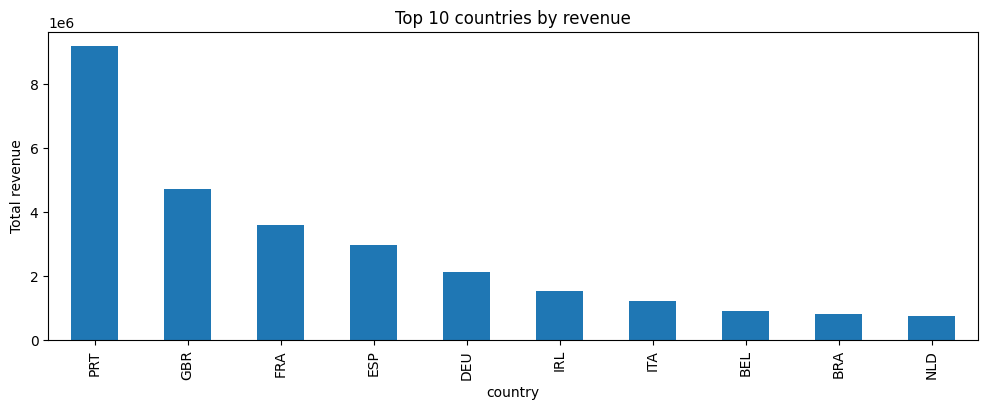

In [132]:
country_revenue = df.groupby('country')['booking_revenue'].sum().sort_values(ascending=False)
print(country_revenue.head(20))

# Top 10 plot
country_revenue.head(10).plot(kind='bar', figsize=(12,4))
plt.title('Top 10 countries by revenue')
plt.ylabel('Total revenue')
plt.show()


#### Insights:
- Country PRT gave maximum revenue.(9173489.95).
- followed by GBR(4722374.74) & FRA(3598339.88).

#### B. Weekend revenues vs. Week day revenue.

In [134]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights',
       'booking_revenue', 'lead_time_bin', 'waiting_bin', 'room_mismatch'],
      dtype='object')

Weekend revenue: 9534919.49
Weekday revenue: 24922317.759999998


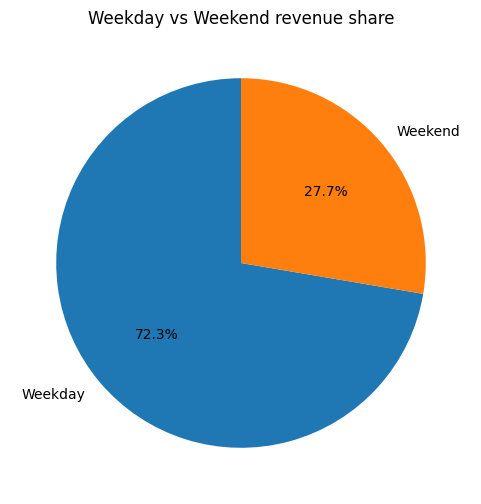

In [139]:
df['weekend_revenue'] = df['adr'] * df['stays_in_weekend_nights'].fillna(0)
df['weekday_revenue'] = df['adr'] * df['stays_in_week_nights'].fillna(0)

total_weekend = df['weekend_revenue'].sum()
total_weekday = df['weekday_revenue'].sum()
print("Weekend revenue:", total_weekend)
print("Weekday revenue:", total_weekday)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie([total_weekday, total_weekend], labels=['Weekday','Weekend'], autopct='%1.1f%%', startangle=90)
plt.title('Weekday vs Weekend revenue share')
plt.show()


#### Insights:
- Weekday Revenue = 24922317.759 which is much greater than Weekend Revenue = 9534919.49 .

#### C. Month & Year wise revenues.

    arrival_date_year arrival_date_month  booking_revenue
0                2022             August       1405188.77
1                2022           December        459008.26
2                2022               July        926487.08
3                2022           November        329437.89
4                2022            October        694177.61
5                2022          September       1070569.95
6                2023              April       1125041.74
7                2023             August       2703454.39
8                2023           December        948051.91
9                2023           February        600515.83
10               2023            January        340233.69
11               2023               July       2093373.08
12               2023               June       1409564.05
13               2023              March        972937.29
14               2023                May       1248959.29
15               2023           November        889840.46
16            

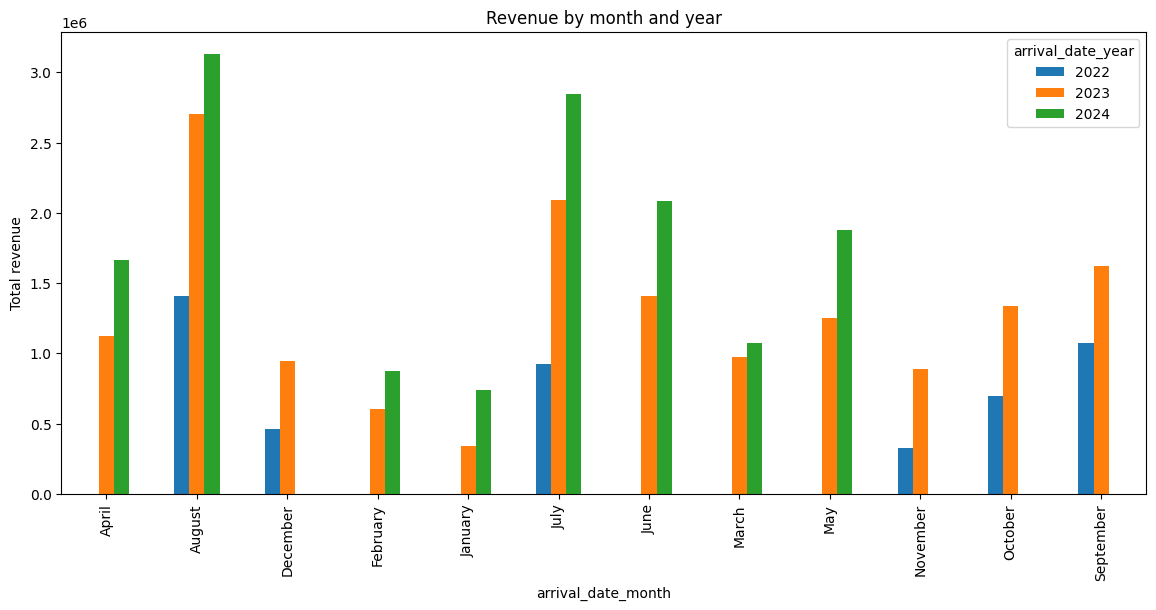

In [149]:
# monthly revenue (year+month)

monthly_rev = df.groupby(['arrival_date_year','arrival_date_month'])['booking_revenue'].sum()
monthly_rev = monthly_rev.reset_index()
print(monthly_rev)
# pivot for plotting
pivot_rev = monthly_rev.pivot(index='arrival_date_month', columns='arrival_date_year', values='booking_revenue')
pivot_rev.plot(kind='bar', figsize=(14,6))
plt.ylabel('Total revenue')
plt.title('Revenue by month and year')
plt.show()


#### Insights:
- Year: 2024, Month: August has produced the most revenue.
- Year: 2022, Month: November has produced the least revenue.

#### D. Distribution channel wise revenues.

distribution_channel
TA/TO        28580667.00
Direct        4998555.11
Corporate      833822.82
GDS             43628.82
Undefined         563.50
Name: booking_revenue, dtype: float64


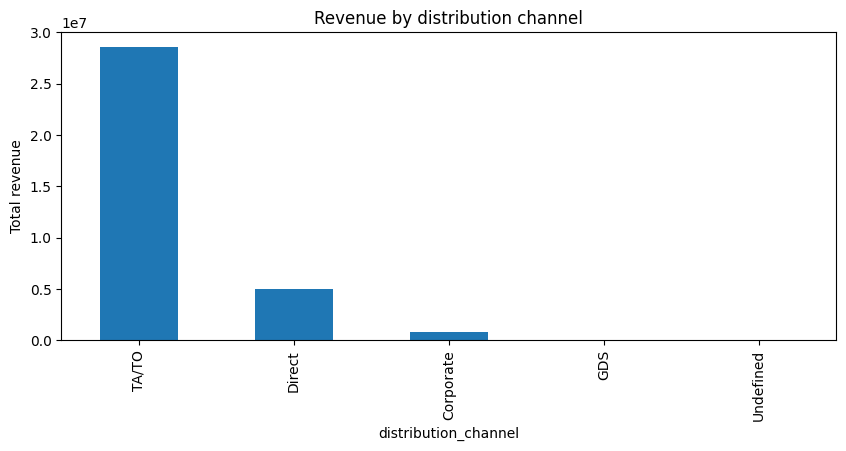

In [152]:
channelwise_revenue = df.groupby('distribution_channel')['booking_revenue'].sum().sort_values(ascending=False)
print(channelwise_revenue)

channelwise_revenue.plot(kind='bar', figsize=(10,4))
plt.title('Revenue by distribution channel')
plt.ylabel('Total revenue')
plt.show()

#### Insight:
- TA/TO Distribution Channel has the most revenue.

#### E. Assigned room type level revenues.

assigned_room_type
A    15324427.10
D     9416095.07
E     3792362.91
F     1990530.74
G     1746483.58
C     1081299.37
B      514709.21
H      496771.67
I       51540.92
K       43008.68
L           8.00
P           0.00
Name: booking_revenue, dtype: float64


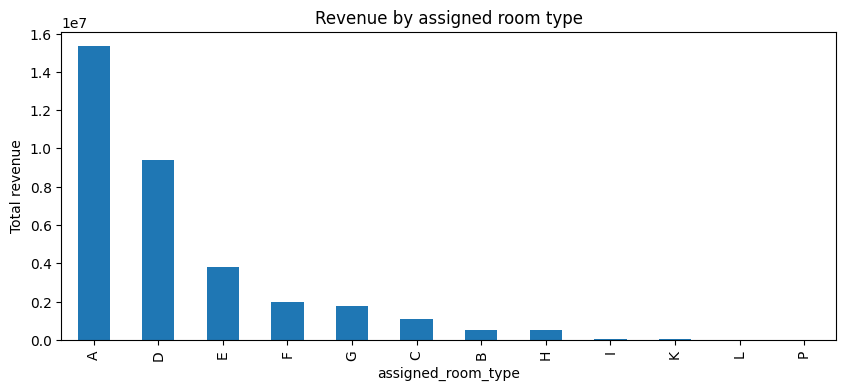

In [153]:
assigned_revenue = df.groupby('assigned_room_type')['booking_revenue'].sum().sort_values(ascending=False)
print(assigned_revenue)
assigned_revenue.head(15).plot(kind='bar', figsize=(10,4))
plt.title('Revenue by assigned room type')
plt.ylabel('Total revenue')
plt.show()

#### Insights:
- assigned_room_type:A has the most revenue.
- assigned_room_type:P has the least revenue.

## Conclusions:
- Cancellations are significantly influenced by lead time, stay duration, and ADR, with longer bookings and higher daily rates showing greater cancellation likelihood.
- Weekend and family bookings exhibit higher cancellation tendencies compared to short, weekday, or solo stays.
- Guests with a history of frequent booking changes or long waiting list durations are more prone to cancel their reservations.
- A noticeable difference between reserved and assigned room types also contributes to increased cancellations.
- Overall, hotels can reduce cancellations by focusing on price optimization, accurate room allocation, and flexible yet strategic cancellation policies for long-duration and high-value bookings.